In [24]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt


In [30]:
import yfinance as yf
import pandas as pd

# Define the tickers and date range
ticker1 = 'TSLA'
ticker2 = 'BND'
ticker3 = 'SPY'
start_date = '2015-01-01'
end_date = '2024-10-31'

# Download the data
data1 = yf.download(ticker1, start=start_date, end=end_date, interval='1d')
data2 = yf.download(ticker2, start=start_date, end=end_date, interval='1d')
data3 = yf.download(ticker3, start=start_date, end=end_date, interval='1d')

# Remove the multi-index and reset the DataFrame for proper formatting
data1.reset_index(inplace=True)
data2.reset_index(inplace=True)
data3.reset_index(inplace=True)

# Extract the price data (Adj Close, Close, High, Low)
data1_prices = data1[['Date', 'Adj Close', 'Close', 'High', 'Low']]
data2_prices = data2[['Date', 'Adj Close', 'Close', 'High', 'Low']]
data3_prices = data3[['Date', 'Adj Close', 'Close', 'High', 'Low']]

# Extract the volume data
data1_volume = data1[['Date', 'Volume']]
data2_volume = data2[['Date', 'Volume']]
data3_volume = data3[['Date', 'Volume']]

# Save the price data to CSV files
data1_prices.to_csv('../data/teslafinancial_data_prices.csv', index=False)
data2_prices.to_csv('../data/bndfinancial_data_prices.csv', index=False)
data3_prices.to_csv('../data/spyfinancial_data_prices.csv', index=False)

# Save the volume data to CSV files
data1_volume.to_csv('../data/teslafinancial_data_volume.csv', index=False)
data2_volume.to_csv('../data/bndfinancial_data_volume.csv', index=False)
data3_volume.to_csv('../data/spyfinancial_data_volume.csv', index=False)

# Display the first few rows of each dataset for prices and volume
print("TSLA Price Data:")
print(data1_prices.head())

print("\nBND Price Data:")
print(data2_prices.head())

print("\nSPY Price Data:")
print(data3_prices.head())

print("\nTSLA Volume Data:")
print(data1_volume.head())

print("\nBND Volume Data:")
print(data2_volume.head())

print("\nSPY Volume Data:")
print(data3_volume.head())


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


TSLA Price Data:
Price                       Date  Adj Close      Close       High        Low
Ticker                                 TSLA       TSLA       TSLA       TSLA
0      2015-01-02 00:00:00+00:00  14.620667  14.620667  14.883333  14.217333
1      2015-01-05 00:00:00+00:00  14.006000  14.006000  14.433333  13.810667
2      2015-01-06 00:00:00+00:00  14.085333  14.085333  14.280000  13.614000
3      2015-01-07 00:00:00+00:00  14.063333  14.063333  14.318667  13.985333
4      2015-01-08 00:00:00+00:00  14.041333  14.041333  14.253333  14.000667

BND Price Data:
Price                       Date  Adj Close      Close       High        Low
Ticker                                  BND        BND        BND        BND
0      2015-01-02 00:00:00+00:00  63.358761  82.650002  82.690002  82.419998
1      2015-01-05 00:00:00+00:00  63.542778  82.889999  82.919998  82.699997
2      2015-01-06 00:00:00+00:00  63.726673  83.129997  83.379997  83.029999
3      2015-01-07 00:00:00+00:00  63.76502

In [44]:
import pandas as pd 
data = pd.read_csv('../data/teslafinancial_data.csv')
framed_data = pd.DataFrame(data)

In [45]:
# Check basic statistics for the data
basic_stats = framed_data.describe()

# Display the statistics
print(basic_stats)


         Adj Close        Close         High          Low        Volume
count  2474.000000  2474.000000  2474.000000  2474.000000  2.474000e+03
mean    111.438965   111.438965   113.895836   108.869421  1.125745e+08
std     110.120450   110.120450   112.643277   107.541830  7.449619e+07
min       9.578000     9.578000    10.331333     9.403333  1.062000e+07
25%      17.066167    17.066167    17.368167    16.790167  6.682590e+07
50%      25.043000    25.043000    25.279000    24.462334  9.289395e+07
75%     216.865002   216.865002   221.910004   212.084999  1.301899e+08
max     409.970001   409.970001   414.496674   405.666656  9.140820e+08


In [46]:
framed_data = pd.DataFrame(data)

# Iterate through columns and print data types
for column in framed_data.columns:
    print(f"{column}: {framed_data[column].dtype}")

Date: object
Adj Close: float64
Close: float64
High: float64
Low: float64
Volume: float64


In [47]:
print(framed_data.isnull().sum())

Date         1
Adj Close    1
Close        1
High         1
Low          1
Volume       1
dtype: int64


In [48]:
import yfinance as yf
import pandas as pd

# Define the tickers and date range
ticker1 = 'TSLA'
ticker2 = 'BND'
ticker3 = 'SPY'
start_date = '2015-01-01'
end_date = '2024-10-31'

# Download the data
data1 = yf.download(ticker1, start=start_date, end=end_date, interval='1d')
data2 = yf.download(ticker2, start=start_date, end=end_date, interval='1d')
data3 = yf.download(ticker3, start=start_date, end=end_date, interval='1d')

# Reset index to treat 'Date' as a column
data1.reset_index(inplace=True)
data2.reset_index(inplace=True)
data3.reset_index(inplace=True)

# Z-score normalization (Standardization)
columns_to_normalize = ['Adj Close', 'Close', 'High', 'Low']

data1[columns_to_normalize] = data1[columns_to_normalize].apply(lambda x: (x - x.mean()) / x.std())
data2[columns_to_normalize] = data2[columns_to_normalize].apply(lambda x: (x - x.mean()) / x.std())
data3[columns_to_normalize] = data3[columns_to_normalize].apply(lambda x: (x - x.mean()) / x.std())

# Save the normalized data to CSV files
data1.to_csv('../data/teslafinancial_data_normalized.csv', index=False)
data2.to_csv('../data/bndfinancial_data_normalized.csv', index=False)
data3.to_csv('../data/spyfinancial_data_normalized.csv', index=False)

# Display the first few rows of each normalized dataset
print("TSLA Normalized Data:")
print(data1.head())

print("\nBND Normalized Data:")
print(data2.head())

print("\nSPY Normalized Data:")
print(data3.head())


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


TSLA Normalized Data:
Price                       Date Adj Close     Close      High       Low  \
Ticker                                TSLA      TSLA      TSLA      TSLA   
0      2015-01-02 00:00:00+00:00 -0.879204 -0.879204 -0.878992 -0.880142   
1      2015-01-05 00:00:00+00:00 -0.884785 -0.884785 -0.882987 -0.883924   
2      2015-01-06 00:00:00+00:00 -0.884065 -0.884065 -0.884348 -0.885752   
3      2015-01-07 00:00:00+00:00 -0.884265 -0.884265 -0.884005 -0.882299   
4      2015-01-08 00:00:00+00:00 -0.884465 -0.884465 -0.884585 -0.882157   

Price        Open    Volume  
Ticker       TSLA      TSLA  
0       14.858000  71466000  
1       14.303333  80527500  
2       14.004000  93928500  
3       14.223333  44526000  
4       14.187333  51637500  

BND Normalized Data:
Price                       Date Adj Close     Close      High       Low  \
Ticker                                 BND       BND       BND       BND   
0      2015-01-02 00:00:00+00:00 -1.376401  0.457856  0.44445

In [63]:
read_data = pd.read_csv('../data/teslafinancial_data_normalized.csv')
framed_data_normalized = pd.DataFrame(read_data)
read_data2 = pd.read_csv('../data/bndfinancial_data_normalized.csv')
framed_data_normalized2 = pd.DataFrame(read_data2)
read_data3 = pd.read_csv('../data/spyfinancial_data_normalized.csv')
framed_data_normalized3 = pd.DataFrame(read_data3)

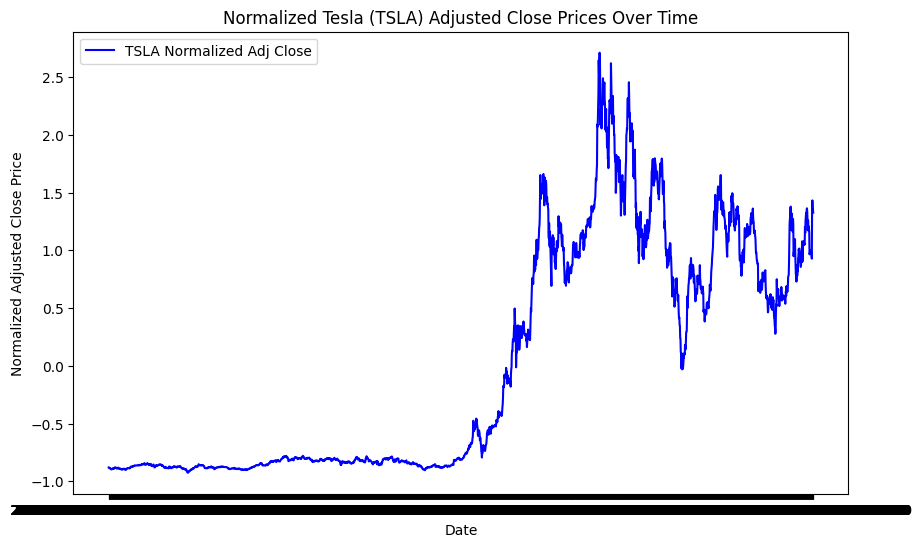

In [64]:
import matplotlib.pyplot as plt

# Assuming the DataFrame `framed_data_normalized` contains the normalized data with columns: 'Date', 'Adj Close', 'Close', etc.

# Plot for TSLA normalized Adj Close prices
plt.figure(figsize=(10, 6))  # Create a new figure
plt.plot(framed_data_normalized['Date'], framed_data_normalized['Adj Close'], label='TSLA Normalized Adj Close', color='blue')

# Add title and labels
plt.title('Normalized Tesla (TSLA) Adjusted Close Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Normalized Adjusted Close Price')

# Show the plot
plt.legend()
plt.show()


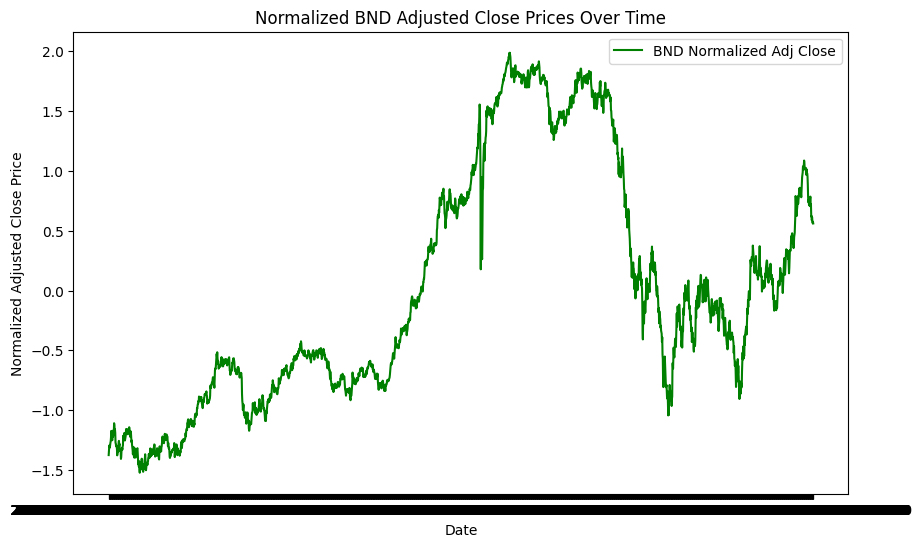

In [65]:
import matplotlib.pyplot as plt

# Assuming the DataFrame `framed_data_normalized` contains the normalized data with columns: 'Date', 'Adj Close', 'Close', etc.

# Plot for BND normalized Adj Close prices
plt.figure(figsize=(10, 6))  # Create a new figure
plt.plot(framed_data_normalized2['Date'], framed_data_normalized2['Adj Close'], label='BND Normalized Adj Close', color='green')

# Add title and labels
plt.title('Normalized BND Adjusted Close Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Normalized Adjusted Close Price')

# Show the plot
plt.legend()
plt.show()


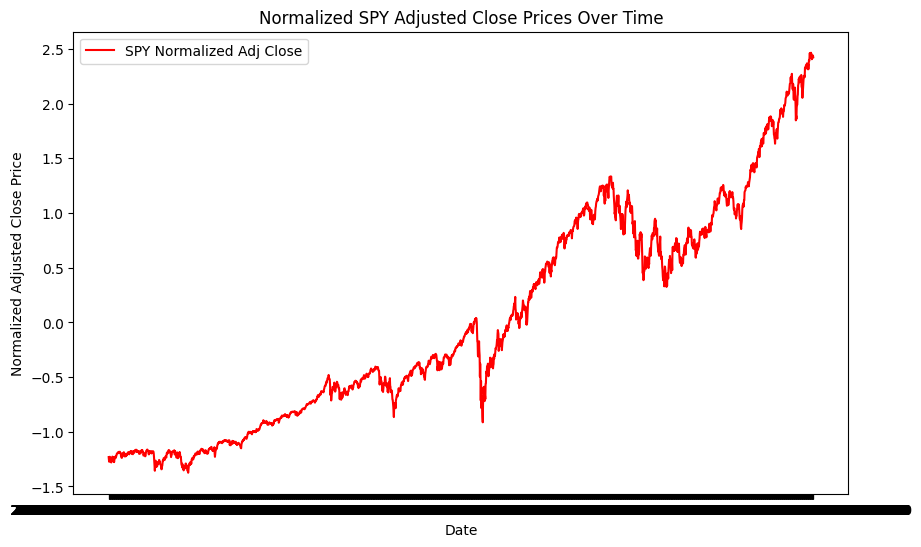

In [66]:
import matplotlib.pyplot as plt

# Assuming the DataFrame `framed_data_normalized` contains the normalized data with columns: 'Date', 'Adj Close', 'Close', etc.

# Plot for SPY normalized Adj Close prices
plt.figure(figsize=(10, 6))  # Create a new figure
plt.plot(framed_data_normalized3['Date'], framed_data_normalized3['Adj Close'], label='SPY Normalized Adj Close', color='red')

# Add title and labels
plt.title('Normalized SPY Adjusted Close Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Normalized Adjusted Close Price')

# Show the plot
plt.legend()
plt.show()


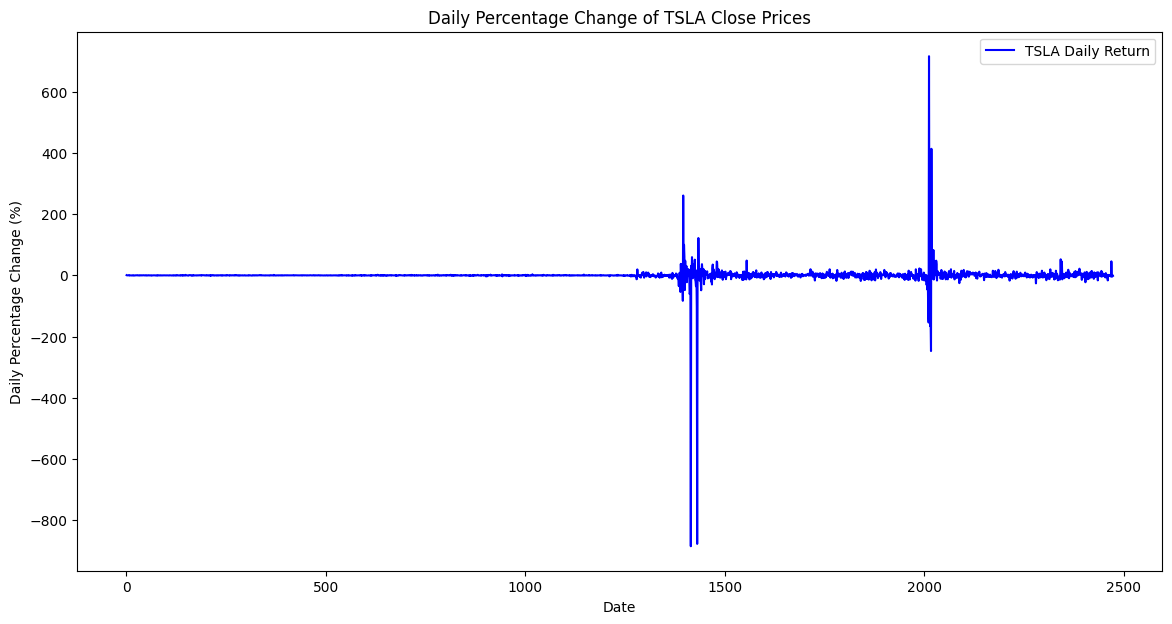

In [67]:
import matplotlib.pyplot as plt

# Assuming `framed_data_normalized` contains the data with 'Close' prices for TSLA.

# Calculate daily percentage change (returns) for TSLA's 'Close' price
daily_returns_tsla = framed_data_normalized['Adj Close'].pct_change() * 100  # Multiply by 100 to get percentage

# Plot the daily returns for TSLA
plt.figure(figsize=(14, 7))  # Create a new figure
plt.plot(daily_returns_tsla.index, daily_returns_tsla, label='TSLA Daily Return', color='blue')

# Title and labels for the plot
plt.title('Daily Percentage Change of TSLA Close Prices')
plt.xlabel('Date')
plt.ylabel('Daily Percentage Change (%)')

# Show the legend and plot
plt.legend()
plt.show()


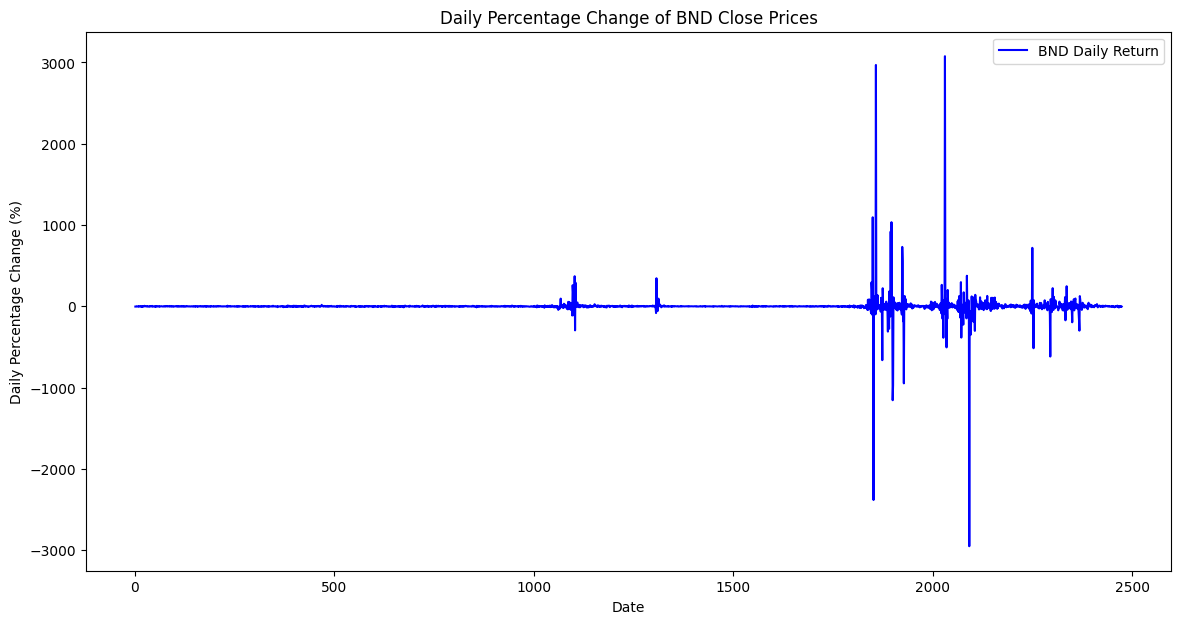

In [68]:
import matplotlib.pyplot as plt

# Assuming `framed_data_normalized` contains the data with 'Close' prices for BND.

# Calculate daily percentage change (returns) for BND's 'Close' price
daily_returns_tsla = framed_data_normalized2['Adj Close'].pct_change() * 100  # Multiply by 100 to get percentage

# Plot the daily returns for BND
plt.figure(figsize=(14, 7))  # Create a new figure
plt.plot(daily_returns_tsla.index, daily_returns_tsla, label='BND Daily Return', color='blue')

# Title and labels for the plot
plt.title('Daily Percentage Change of BND Close Prices')
plt.xlabel('Date')
plt.ylabel('Daily Percentage Change (%)')

# Show the legend and plot
plt.legend()
plt.show()


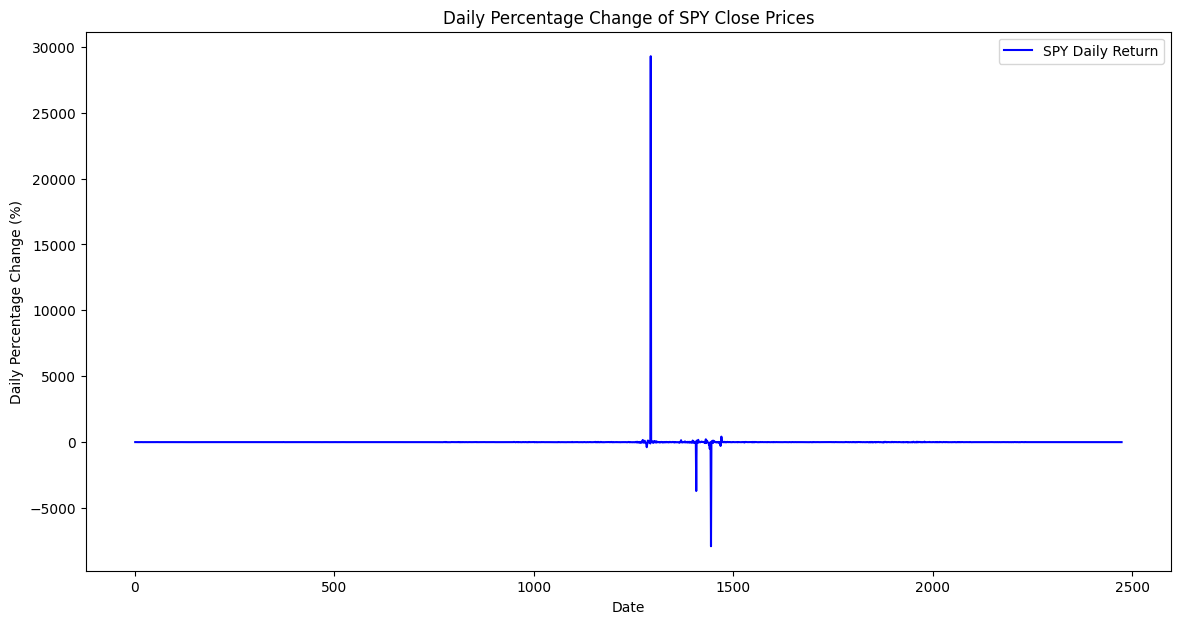

In [69]:
import matplotlib.pyplot as plt

# Assuming `framed_data_normalized` contains the data with 'Close' prices for SPY.

# Calculate daily percentage change (returns) for SPY's 'Close' price
daily_returns_tsla = framed_data_normalized3['Adj Close'].pct_change() * 100  # Multiply by 100 to get percentage

# Plot the daily returns for BND
plt.figure(figsize=(14, 7))  # Create a new figure
plt.plot(daily_returns_tsla.index, daily_returns_tsla, label='SPY Daily Return', color='blue')

# Title and labels for the plot
plt.title('Daily Percentage Change of SPY Close Prices')
plt.xlabel('Date')
plt.ylabel('Daily Percentage Change (%)')

# Show the legend and plot
plt.legend()
plt.show()


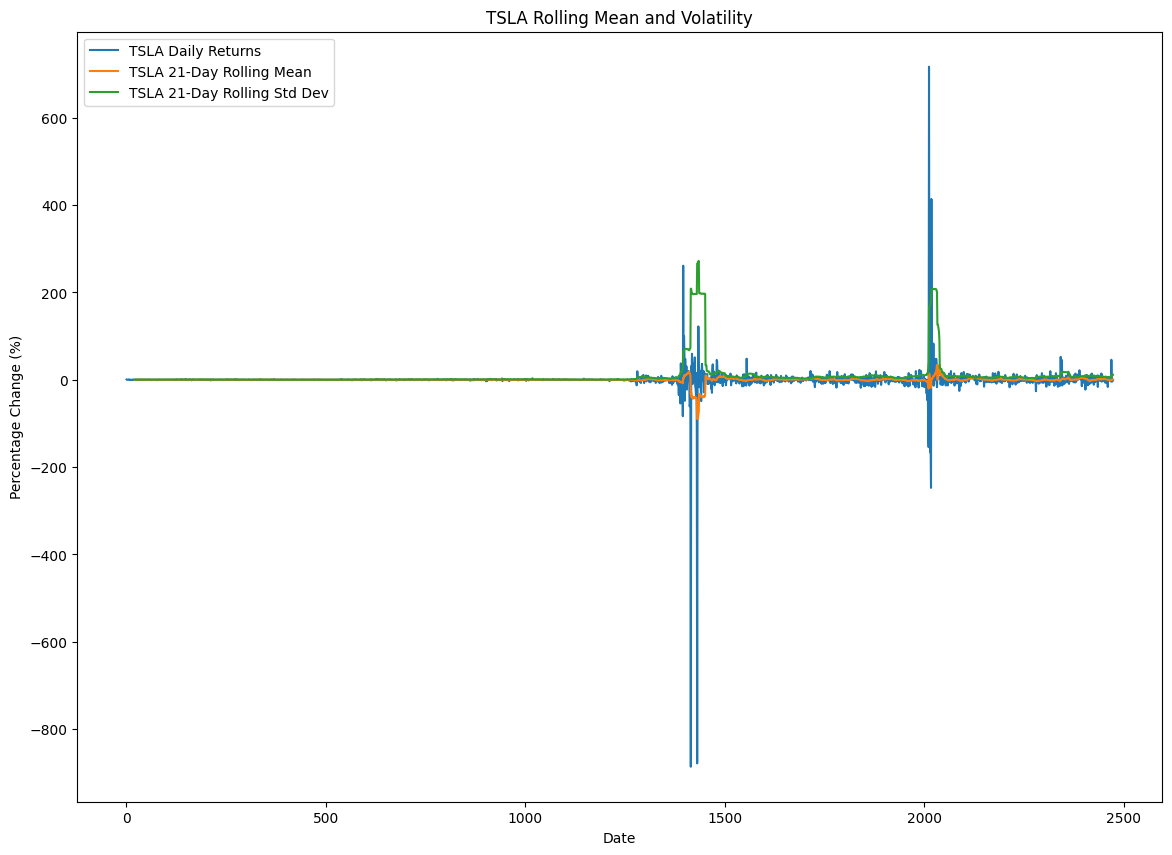


Outliers for TSLA:
 63      -0.817245
78      -0.902864
107     -0.502657
114     -0.513936
118     -0.558157
          ...    
2395   -14.642246
2404   -22.520946
2435   -16.373143
2460   -16.468884
2469    45.816990
Name: Adj Close, Length: 133, dtype: float64

Day with highest return for TSLA:
2012 - 716.7392613265617%

Day with lowest return for TSLA:
1415 - -885.9141616997316%


In [71]:
import matplotlib.pyplot as plt
import pandas as pd

# Example DataFrame loading (replace this with your actual data)
# Assuming `framed_data` contains the stock data for TSLA, BND, and SPY
# For example, it should have 'Date' as the index and 'Adj Close' as the column for adjusted close prices

# If your data is in a CSV or another format, load it here
# framed_data = pd.read_csv('your_data.csv', parse_dates=['Date'], index_col='Date')

# Calculate daily percentage change (returns) for TSLA 'Adj Close' price
daily_returns = framed_data_normalized['Adj Close'].pct_change() * 100  # Multiply by 100 to get percentage change

# Define the rolling window
rolling_window = 21

# Calculate rolling mean and rolling standard deviation for TSLA
rolling_mean = daily_returns.rolling(window=rolling_window).mean()
rolling_std = daily_returns.rolling(window=rolling_window).std()

# Plot for TSLA
plt.figure(figsize=(14, 10))
plt.plot(daily_returns.index, daily_returns, label="TSLA Daily Returns")
plt.plot(rolling_mean.index, rolling_mean, label=f"TSLA {rolling_window}-Day Rolling Mean")
plt.plot(rolling_std.index, rolling_std, label=f"TSLA {rolling_window}-Day Rolling Std Dev")
plt.title('TSLA Rolling Mean and Volatility')
plt.xlabel('Date')
plt.ylabel('Percentage Change (%)')
plt.legend(loc='upper left')
plt.show()

# Detect outliers: returns beyond 2 standard deviations from the rolling mean for TSLA
outliers_TSLA = (daily_returns - rolling_mean).abs() > (2 * rolling_std)

# Display outliers for TSLA
print("\nOutliers for TSLA:\n", daily_returns[outliers_TSLA].dropna())

# Find the days with highest and lowest returns for TSLA
high_return_TSLA = daily_returns.idxmax()
low_return_TSLA = daily_returns.idxmin()

print("\nDay with highest return for TSLA:")
print(f"{high_return_TSLA} - {daily_returns.loc[high_return_TSLA]}%")

print("\nDay with lowest return for TSLA:")
print(f"{low_return_TSLA} - {daily_returns.loc[low_return_TSLA]}%")


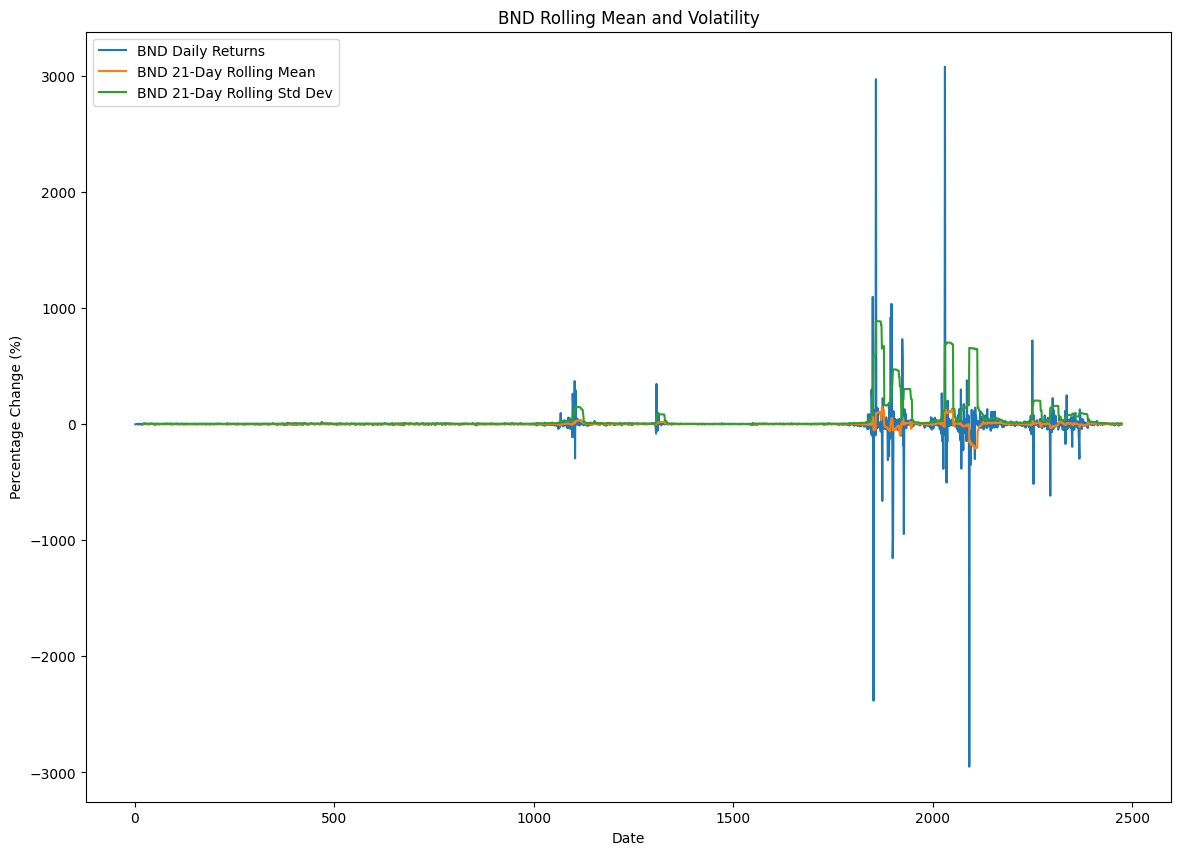


Outliers for BND:
 24        7.129030
51       -6.198926
75        4.166963
178      -5.186951
230      -3.714163
           ...    
2367   -298.713444
2454     -7.079603
2455    -11.312849
2462      8.378522
2466    -14.159191
Name: Adj Close, Length: 138, dtype: float64

Day with highest return for BND:
2030 - 3076.914077182887%

Day with lowest return for BND:
2091 - -2950.657828697577%


In [75]:
import matplotlib.pyplot as plt
import pandas as pd

# Example DataFrame loading (replace this with your actual data)
# Assuming `framed_data` contains the stock data for TSLA, BND, and SPY
# For example, it should have 'Date' as the index and 'Adj Close' as the column for adjusted close prices

# If your data is in a CSV or another format, load it here
# framed_data = pd.read_csv('your_data.csv', parse_dates=['Date'], index_col='Date')

# Calculate daily percentage change (returns) for TSLA 'Adj Close' price
daily_returns = framed_data_normalized2['Adj Close'].pct_change() * 100  # Multiply by 100 to get percentage change

# Define the rolling window
rolling_window = 21

# Calculate rolling mean and rolling standard deviation for TSLA
rolling_mean = daily_returns.rolling(window=rolling_window).mean()
rolling_std = daily_returns.rolling(window=rolling_window).std()

# Plot for TSLA
plt.figure(figsize=(14, 10))
plt.plot(daily_returns.index, daily_returns, label="BND Daily Returns")
plt.plot(rolling_mean.index, rolling_mean, label=f"BND {rolling_window}-Day Rolling Mean")
plt.plot(rolling_std.index, rolling_std, label=f"BND {rolling_window}-Day Rolling Std Dev")
plt.title('BND Rolling Mean and Volatility')
plt.xlabel('Date')
plt.ylabel('Percentage Change (%)')
plt.legend(loc='upper left')
plt.show()

# Detect outliers: returns beyond 2 standard deviations from the rolling mean for TSLA
outliers_TSLA = (daily_returns - rolling_mean).abs() > (2 * rolling_std)

# Display outliers for TSLA
print("\nOutliers for BND:\n", daily_returns[outliers_TSLA].dropna())

# Find the days with highest and lowest returns for TSLA
high_return_TSLA = daily_returns.idxmax()
low_return_TSLA = daily_returns.idxmin()

print("\nDay with highest return for BND:")
print(f"{high_return_TSLA} - {daily_returns.loc[high_return_TSLA]}%")

print("\nDay with lowest return for BND:")
print(f"{low_return_TSLA} - {daily_returns.loc[low_return_TSLA]}%")


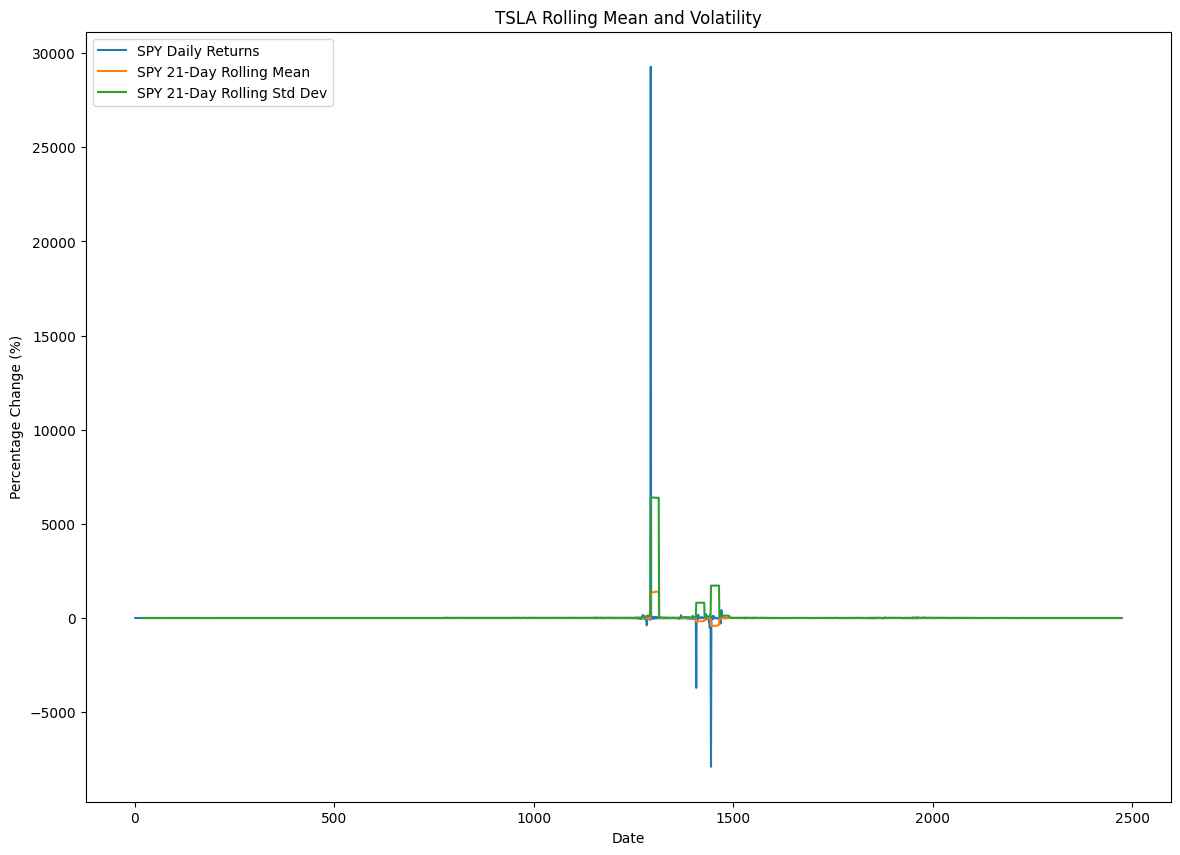


Outliers for SPY:
 43      1.878380
45      2.116731
109    -1.582680
122     2.842114
159     2.782866
          ...   
2395   -1.935131
2399   -3.122337
2404   -5.173667
2412   -7.000599
2415    5.779577
Name: Adj Close, Length: 125, dtype: float64

Day with highest return for SPY:
1293 - 29281.7282133448%

Day with lowest return for SPY:
1444 - -7898.640253090583%


In [76]:
import matplotlib.pyplot as plt
import pandas as pd

# Example DataFrame loading (replace this with your actual data)
# Assuming `framed_data` contains the stock data for TSLA, BND, and SPY
# For example, it should have 'Date' as the index and 'Adj Close' as the column for adjusted close prices

# If your data is in a CSV or another format, load it here
# framed_data = pd.read_csv('your_data.csv', parse_dates=['Date'], index_col='Date')

# Calculate daily percentage change (returns) for TSLA 'Adj Close' price
daily_returns = framed_data_normalized3['Adj Close'].pct_change() * 100  # Multiply by 100 to get percentage change

# Define the rolling window
rolling_window = 21

# Calculate rolling mean and rolling standard deviation for TSLA
rolling_mean = daily_returns.rolling(window=rolling_window).mean()
rolling_std = daily_returns.rolling(window=rolling_window).std()

# Plot for TSLA
plt.figure(figsize=(14, 10))
plt.plot(daily_returns.index, daily_returns, label="SPY Daily Returns")
plt.plot(rolling_mean.index, rolling_mean, label=f"SPY {rolling_window}-Day Rolling Mean")
plt.plot(rolling_std.index, rolling_std, label=f"SPY {rolling_window}-Day Rolling Std Dev")
plt.title('TSLA Rolling Mean and Volatility')
plt.xlabel('Date')
plt.ylabel('Percentage Change (%)')
plt.legend(loc='upper left')
plt.show()

# Detect outliers: returns beyond 2 standard deviations from the rolling mean for TSLA
outliers_TSLA = (daily_returns - rolling_mean).abs() > (2 * rolling_std)

# Display outliers for TSLA
print("\nOutliers for SPY:\n", daily_returns[outliers_TSLA].dropna())

# Find the days with highest and lowest returns for TSLA
high_return_TSLA = daily_returns.idxmax()
low_return_TSLA = daily_returns.idxmin()

print("\nDay with highest return for SPY:")
print(f"{high_return_TSLA} - {daily_returns.loc[high_return_TSLA]}%")

print("\nDay with lowest return for SPY:")
print(f"{low_return_TSLA} - {daily_returns.loc[low_return_TSLA]}%")


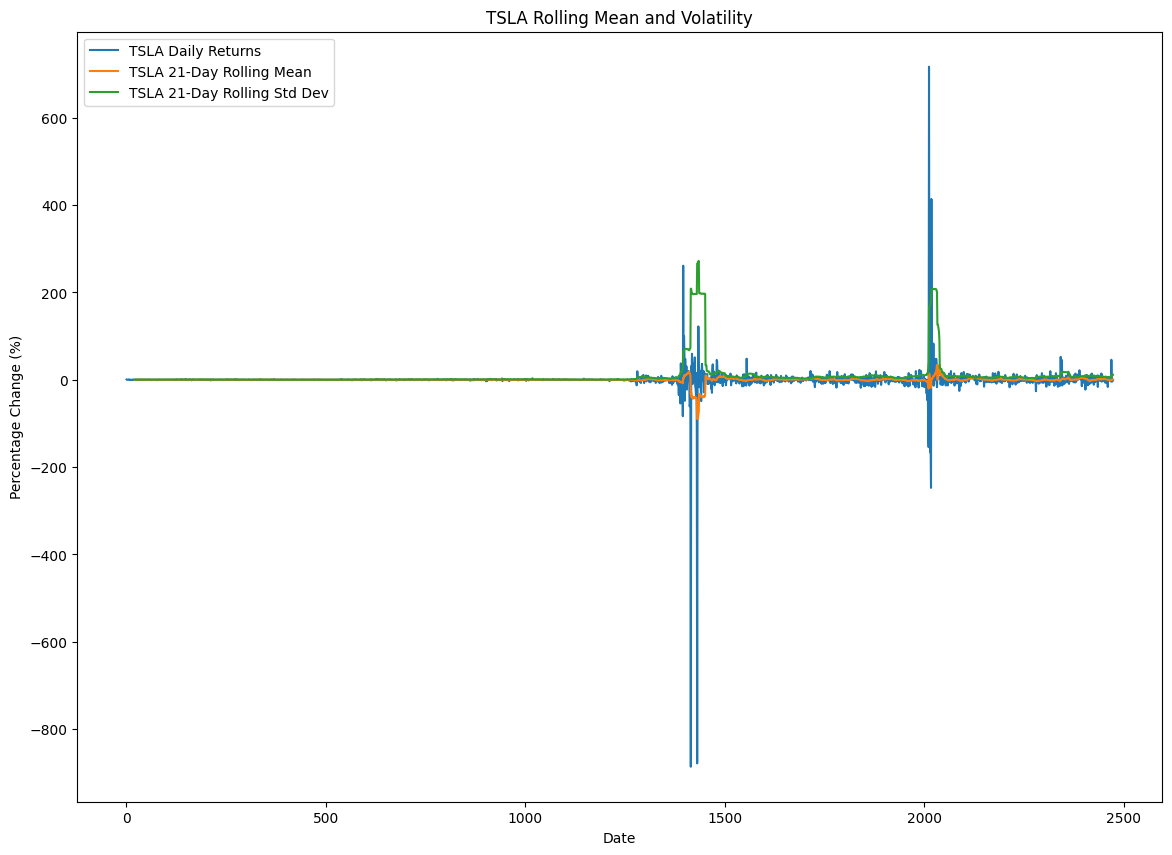


Outliers for TSLA:
 63      -0.817245
78      -0.902864
107     -0.502657
114     -0.513936
118     -0.558157
          ...    
2395   -14.642246
2404   -22.520946
2435   -16.373143
2460   -16.468884
2469    45.816990
Name: Adj Close, Length: 133, dtype: float64

Day with highest return for TSLA:
2012 - 716.7392613265617%

Day with lowest return for TSLA:
1415 - -885.9141616997316%


In [77]:
import matplotlib.pyplot as plt
import pandas as pd

# Example DataFrame loading (replace this with your actual data)
# Assuming `framed_data_normalized2` contains the stock data for TSLA
# For example, it should have 'Date' as the index and 'Adj Close' as the column for adjusted close prices

# If your data is in a CSV or another format, load it here
# framed_data_normalized2 = pd.read_csv('your_data.csv', parse_dates=['Date'], index_col='Date')

# Calculate daily percentage change (returns) for TSLA 'Adj Close' price
daily_returns = framed_data_normalized['Adj Close'].pct_change() * 100  # Multiply by 100 to get percentage change

# Define the rolling window
rolling_window = 21

# Calculate rolling mean and rolling standard deviation for TSLA
rolling_mean = daily_returns.rolling(window=rolling_window).mean()
rolling_std = daily_returns.rolling(window=rolling_window).std()

# Plot for TSLA
plt.figure(figsize=(14, 10))
plt.plot(daily_returns.index, daily_returns, label="TSLA Daily Returns")
plt.plot(rolling_mean.index, rolling_mean, label=f"TSLA {rolling_window}-Day Rolling Mean")
plt.plot(rolling_std.index, rolling_std, label=f"TSLA {rolling_window}-Day Rolling Std Dev")
plt.title('TSLA Rolling Mean and Volatility')
plt.xlabel('Date')
plt.ylabel('Percentage Change (%)')
plt.legend(loc='upper left')
plt.show()

# Detect outliers: returns beyond 2 standard deviations from the rolling mean for TSLA
outliers_TSLA = (daily_returns - rolling_mean).abs() > (2 * rolling_std)

# Display outliers for TSLA
print("\nOutliers for TSLA:\n", daily_returns[outliers_TSLA].dropna())

# Find the days with highest and lowest returns for TSLA
high_return_TSLA = daily_returns.idxmax()
low_return_TSLA = daily_returns.idxmin()

print("\nDay with highest return for TSLA:")
print(f"{high_return_TSLA} - {daily_returns.loc[high_return_TSLA]}%")

print("\nDay with lowest return for TSLA:")
print(f"{low_return_TSLA} - {daily_returns.loc[low_return_TSLA]}%")


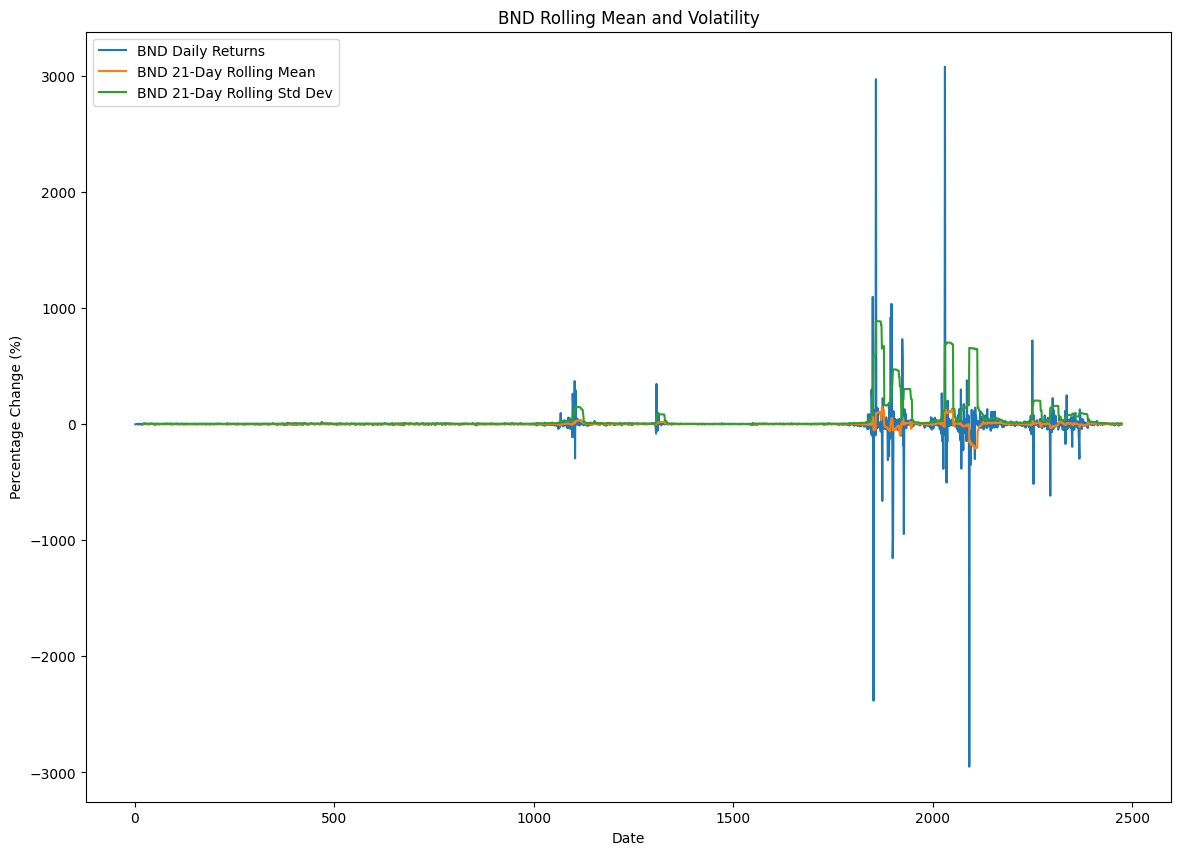


Outliers for BND:
 24        7.129030
51       -6.198926
75        4.166963
178      -5.186951
230      -3.714163
           ...    
2367   -298.713444
2454     -7.079603
2455    -11.312849
2462      8.378522
2466    -14.159191
Name: Adj Close, Length: 138, dtype: float64

Day with highest return for BND:
2030 - 3076.914077182887%

Day with lowest return for BND:
2091 - -2950.657828697577%


In [81]:
import matplotlib.pyplot as plt
import pandas as pd

# Example DataFrame loading (replace this with your actual data)
# Assuming `framed_data_normalized` contains the stock data for BND
# For example, it should have 'Date' as the index and 'Adj Close' as the column for adjusted close prices

# If your data is in a CSV or another format, load it here
# framed_data_normalized = pd.read_csv('your_data.csv', parse_dates=['Date'], index_col='Date')

# Calculate daily percentage change (returns) for BND 'Adj Close' price
daily_returns = framed_data_normalized2['Adj Close'].pct_change() * 100  # Multiply by 100 to get percentage change

# Define the rolling window
rolling_window = 21

# Calculate rolling mean and rolling standard deviation for BND
rolling_mean = daily_returns.rolling(window=rolling_window).mean()
rolling_std = daily_returns.rolling(window=rolling_window).std()

# Plot for BND
plt.figure(figsize=(14, 10))
plt.plot(daily_returns.index, daily_returns, label="BND Daily Returns")
plt.plot(rolling_mean.index, rolling_mean, label=f"BND {rolling_window}-Day Rolling Mean")
plt.plot(rolling_std.index, rolling_std, label=f"BND {rolling_window}-Day Rolling Std Dev")
plt.title('BND Rolling Mean and Volatility')
plt.xlabel('Date')
plt.ylabel('Percentage Change (%)')
plt.legend(loc='upper left')
plt.show()

# Detect outliers: returns beyond 2 standard deviations from the rolling mean for BND
outliers_BND = (daily_returns - rolling_mean).abs() > (2 * rolling_std)

# Display outliers for BND
print("\nOutliers for BND:\n", daily_returns[outliers_BND].dropna())

# Find the days with highest and lowest returns for BND
high_return_BND = daily_returns.idxmax()
low_return_BND = daily_returns.idxmin()

print("\nDay with highest return for BND:")
print(f"{high_return_BND} - {daily_returns.loc[high_return_BND]}%")

print("\nDay with lowest return for BND:")
print(f"{low_return_BND} - {daily_returns.loc[low_return_BND]}%")


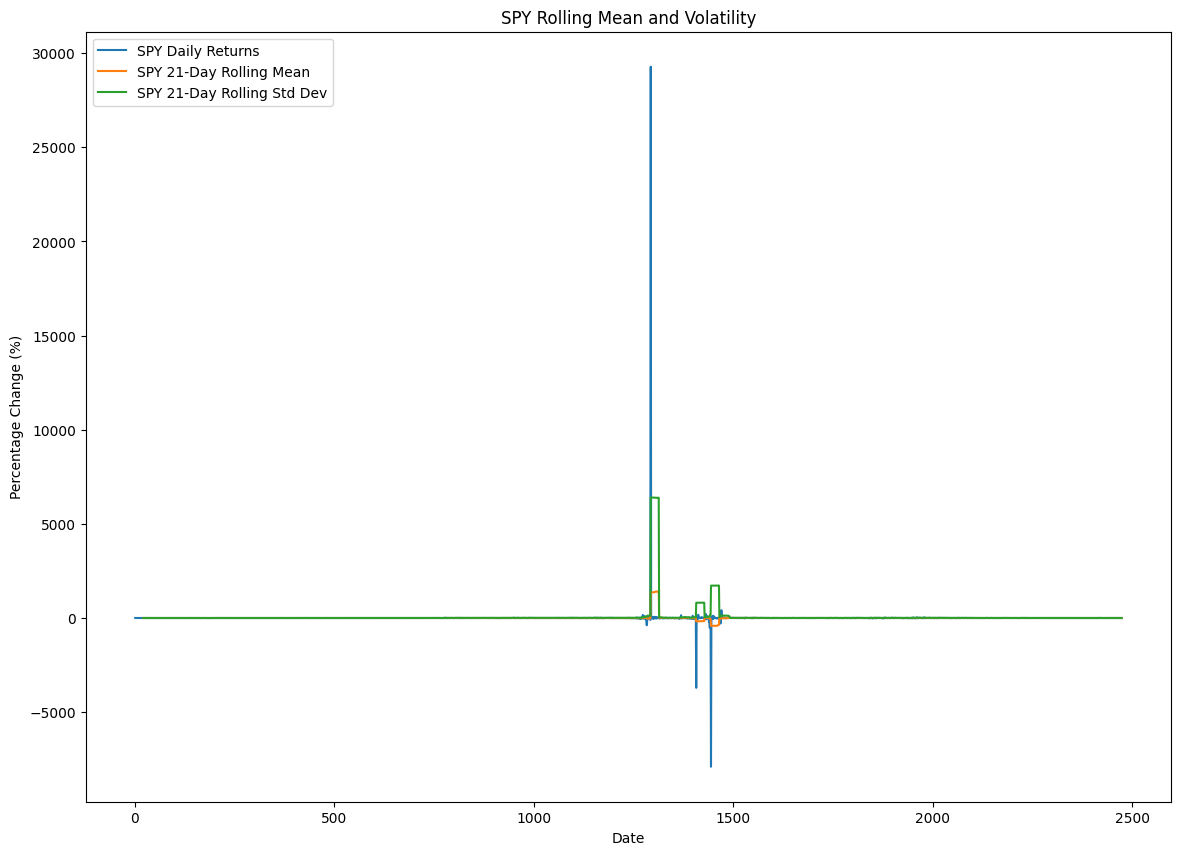


Outliers for SPY:
 43      1.878380
45      2.116731
109    -1.582680
122     2.842114
159     2.782866
          ...   
2395   -1.935131
2399   -3.122337
2404   -5.173667
2412   -7.000599
2415    5.779577
Name: Adj Close, Length: 125, dtype: float64

Day with highest return for SPY:
1293 - 29281.7282133448%

Day with lowest return for SPY:
1444 - -7898.640253090583%


In [82]:
import matplotlib.pyplot as plt
import pandas as pd

# Example DataFrame loading (replace this with your actual data)
# Assuming `framed_data_normalized` contains the stock data for SPY
# For example, it should have 'Date' as the index and 'Adj Close' as the column for adjusted close prices

# If your data is in a CSV or another format, load it here
# framed_data_normalized = pd.read_csv('your_data.csv', parse_dates=['Date'], index_col='Date')

# Calculate daily percentage change (returns) for SPY 'Adj Close' price
daily_returns = framed_data_normalized3['Adj Close'].pct_change() * 100  # Multiply by 100 to get percentage change

# Define the rolling window
rolling_window = 21

# Calculate rolling mean and rolling standard deviation for SPY
rolling_mean = daily_returns.rolling(window=rolling_window).mean()
rolling_std = daily_returns.rolling(window=rolling_window).std()

# Plot for SPY
plt.figure(figsize=(14, 10))
plt.plot(daily_returns.index, daily_returns, label="SPY Daily Returns")
plt.plot(rolling_mean.index, rolling_mean, label=f"SPY {rolling_window}-Day Rolling Mean")
plt.plot(rolling_std.index, rolling_std, label=f"SPY {rolling_window}-Day Rolling Std Dev")
plt.title('SPY Rolling Mean and Volatility')
plt.xlabel('Date')
plt.ylabel('Percentage Change (%)')
plt.legend(loc='upper left')
plt.show()

# Detect outliers: returns beyond 2 standard deviations from the rolling mean for SPY
outliers_SPY = (daily_returns - rolling_mean).abs() > (2 * rolling_std)

# Display outliers for SPY
print("\nOutliers for SPY:\n", daily_returns[outliers_SPY].dropna())

# Find the days with highest and lowest returns for SPY
high_return_SPY = daily_returns.idxmax()
low_return_SPY = daily_returns.idxmin()

print("\nDay with highest return for SPY:")
print(f"{high_return_SPY} - {daily_returns.loc[high_return_SPY]}%")

print("\nDay with lowest return for SPY:")
print(f"{low_return_SPY} - {daily_returns.loc[low_return_SPY]}%")



Rolling Mean and Standard Deviation for TSLA



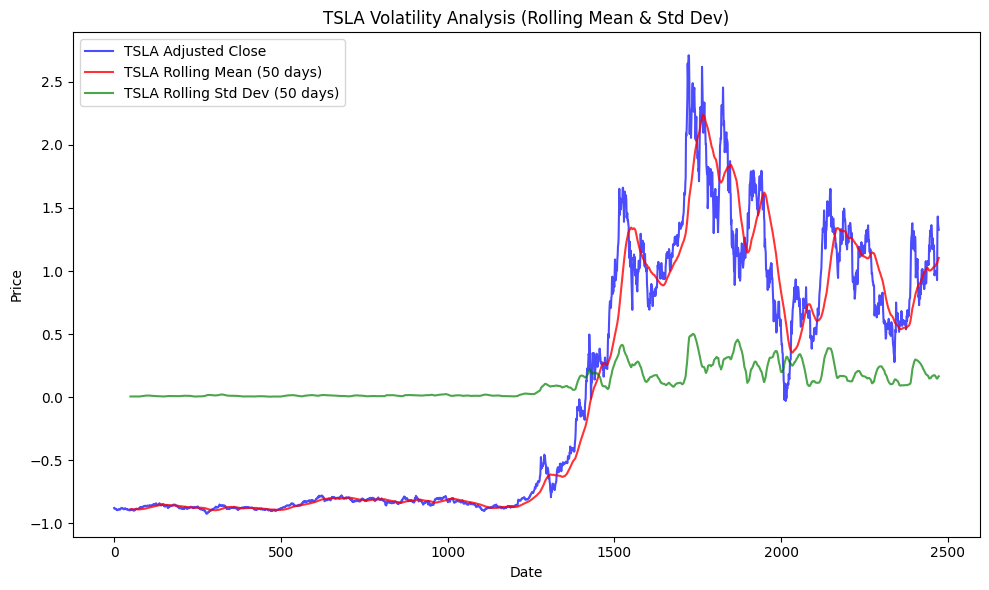

In [85]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the rolling window size
window_size = 50  # You can change this value depending on your analysis

# Calculate rolling mean and standard deviation for TSLA
print(f"\nRolling Mean and Standard Deviation for TSLA\n")

# Calculate rolling mean and standard deviation for TSLA 'Adj Close'
rolling_mean = framed_data_normalized['Adj Close'].rolling(window=window_size).mean()
rolling_std = framed_data_normalized['Adj Close'].rolling(window=window_size).std()

# Plot the results for TSLA
plt.figure(figsize=(10, 6))
plt.plot(framed_data_normalized.index, framed_data_normalized['Adj Close'], label='TSLA Adjusted Close', color='blue', alpha=0.7)
plt.plot(framed_data_normalized.index, rolling_mean, label=f'TSLA Rolling Mean ({window_size} days)', color='red', alpha=0.8)
plt.plot(framed_data_normalized.index, rolling_std, label=f'TSLA Rolling Std Dev ({window_size} days)', color='green', alpha=0.7)

plt.title('TSLA Volatility Analysis (Rolling Mean & Std Dev)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()



Rolling Mean and Standard Deviation for BND



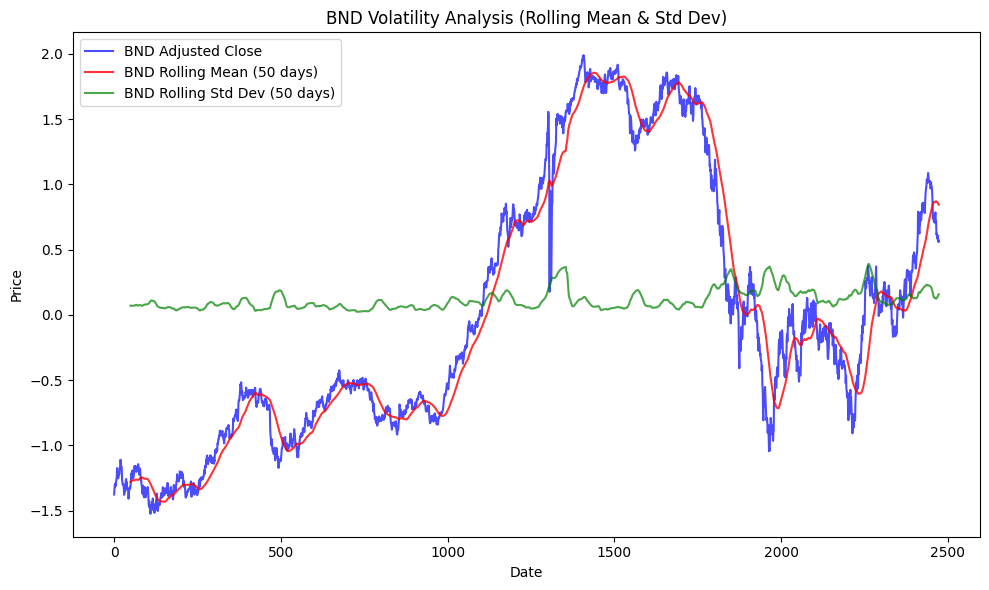

In [87]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the rolling window size
window_size = 50  # You can change this value depending on your analysis

# Calculate rolling mean and standard deviation for TSLA
print(f"\nRolling Mean and Standard Deviation for BND\n")

# Calculate rolling mean and standard deviation for TSLA 'Adj Close'
rolling_mean = framed_data_normalized2['Adj Close'].rolling(window=window_size).mean()
rolling_std = framed_data_normalized2['Adj Close'].rolling(window=window_size).std()

# Plot the results for TSLA
plt.figure(figsize=(10, 6))
plt.plot(framed_data_normalized2.index, framed_data_normalized2['Adj Close'], label='BND Adjusted Close', color='blue', alpha=0.7)
plt.plot(framed_data_normalized2.index, rolling_mean, label=f'BND Rolling Mean ({window_size} days)', color='red', alpha=0.8)
plt.plot(framed_data_normalized2.index, rolling_std, label=f'BND Rolling Std Dev ({window_size} days)', color='green', alpha=0.7)

plt.title('BND Volatility Analysis (Rolling Mean & Std Dev)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()



Rolling Mean and Standard Deviation for SPY



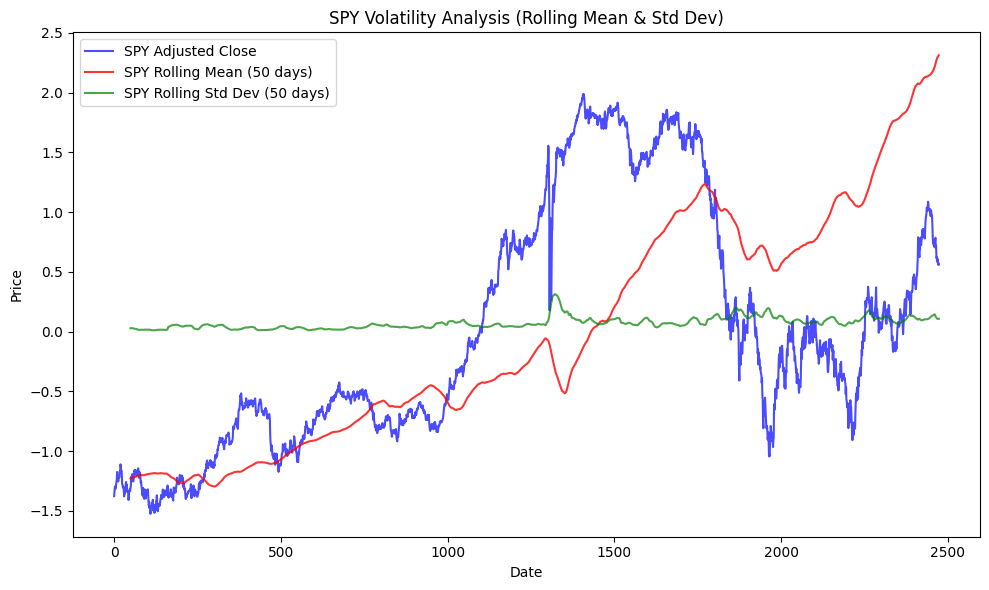

In [88]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the rolling window size
window_size = 50  # You can change this value depending on your analysis

# Calculate rolling mean and standard deviation for TSLA
print(f"\nRolling Mean and Standard Deviation for SPY\n")

# Calculate rolling mean and standard deviation for TSLA 'Adj Close'
rolling_mean = framed_data_normalized3['Adj Close'].rolling(window=window_size).mean()
rolling_std = framed_data_normalized3['Adj Close'].rolling(window=window_size).std()

# Plot the results for TSLA
plt.figure(figsize=(10, 6))
plt.plot(framed_data_normalized3.index, framed_data_normalized2['Adj Close'], label='SPY Adjusted Close', color='blue', alpha=0.7)
plt.plot(framed_data_normalized3.index, rolling_mean, label=f'SPY Rolling Mean ({window_size} days)', color='red', alpha=0.8)
plt.plot(framed_data_normalized3.index, rolling_std, label=f'SPY Rolling Std Dev ({window_size} days)', color='green', alpha=0.7)

plt.title('SPY Volatility Analysis (Rolling Mean & Std Dev)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
